In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG
import scikit_posthocs as sp
from scipy.stats import sem

In [2]:
name = 'perDRG_'

with open('D7_SNI_area.json') as f:
    results_sni_d7 = json.load(f)
with open('D7_Sham_area.json') as f:
    results_sham_d7 = json.load(f)
    

with open('D14_SNI_area.json') as f:
    results_sni_d14 = json.load(f)
with open('D14_Sham_area.json') as f:
    results_sham_d14 = json.load(f) 

In [3]:
sham_il_d7 = analysis_perDRG.GroupData(results_sham_d7, 'IL', number_of_rats=6)
sham_cl_d7 = analysis_perDRG.GroupData(results_sham_d7, 'CL', number_of_rats=6)

sni_il_d7 = analysis_perDRG.GroupData(results_sni_d7, 'IL', number_of_rats=6)
sni_cl_d7 = analysis_perDRG.GroupData(results_sni_d7, 'CL', number_of_rats=6)

sham_il_d14 = analysis_perDRG.GroupData(results_sham_d14, 'IL', number_of_rats=5)
sham_cl_d14 = analysis_perDRG.GroupData(results_sham_d14, 'CL', number_of_rats=5)

sni_il_d14 = analysis_perDRG.GroupData(results_sni_d14, 'IL', number_of_rats=6)
sni_cl_d14 = analysis_perDRG.GroupData(results_sni_d14, 'CL', number_of_rats=6)

In [5]:
def plot_all(feature, ylabel):
    group_a_data = getattr(sham_il_d7, feature)
    group_b_data = getattr(sham_cl_d7, feature)    
    group_c_data = getattr(sni_il_d7, feature)
    group_d_data = getattr(sni_cl_d7, feature)     
    group_a2_data = getattr(sham_il_d14, feature)
    group_b2_data = getattr(sham_cl_d14, feature)    
    group_c2_data = getattr(sni_il_d14, feature)
    group_d2_data = getattr(sni_cl_d14, feature)  
    #statistic(group_a_data, group_b_data)
    
    plt.figure(figsize=(14,8))
    
    labels=['Sham IL', 'Sham CL', 'SNI IL', 'SNI CL','', 'Sham IL', 'Sham CL', 'SNI IL', 'SNI CL']

    c='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 5
    fontsize = 32
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth)
    ymin = -1 
    if 'Neurons/' in ylabel:       
        ymax = 400  
    elif 'normalized intensities' in ylabel:
        ymin=-0.1
        ymax=1.01
    elif 'intensities' in ylabel:
        ymax=4000
    else:
        ymax=101
    ax.set_ylim([ymin, ymax])
    plt.xticks(fontname="Arial", fontsize=fontsize, rotation=45)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    plt.text(s='d7', x=1.5, y=ymax,fontname="Arial", fontsize=32)
    plt.text(s='d14', x=6, y=ymax,fontname="Arial", fontsize=32)

    plt.ylabel(ylabel, fontname="Arial", fontsize=34)
    plt.axvline(4, c='gray', linewidth=4, ls='--')
    #ax.set_aspect(1/50)

    colorpalett = sns.color_palette('tab20')[0:5]+sns.color_palette('tab20')[0:4]

    sns.boxplot(data=[group_a_data, group_b_data, group_c_data, group_d_data, None, group_a2_data, group_b2_data, group_c2_data, group_d2_data], width=0.7, whiskerprops=line_props, boxprops=bbox_props
                ,capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_a_data, group_b_data, group_c_data, group_d_data, np.array([np.nan]), group_a2_data, group_b2_data, group_c2_data, group_d2_data], jitter=0.2, dodge=True, size=8, marker='o', palette=colorpalett)
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=32)
    
    #plt.savefig('Boxplots compact/'+name+feature+'.png', bbox_inches = "tight")
    plt.show()

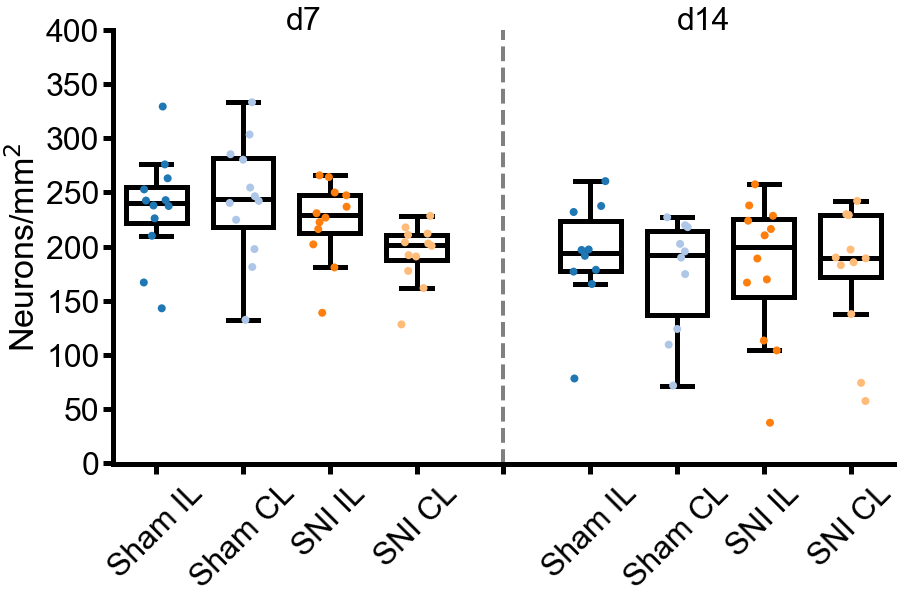

In [6]:
plot_all('neurons_per_tissue', 'Neurons/mm$^2$')

### GFAP rings > 0

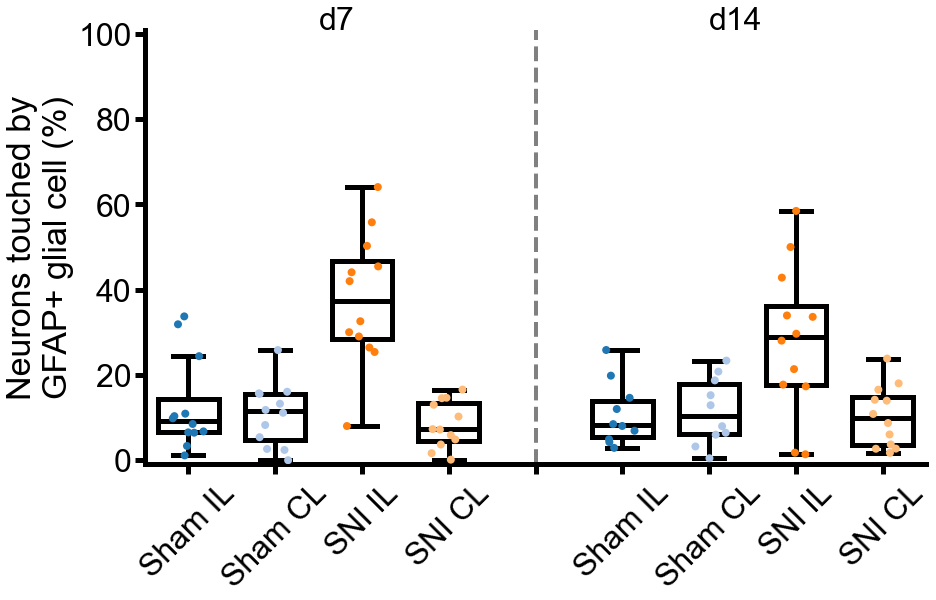

In [7]:
plot_all('ring_ratios_gfap', 'Neurons touched by\nGFAP+ glial cell (%)')

### GS rings > 0

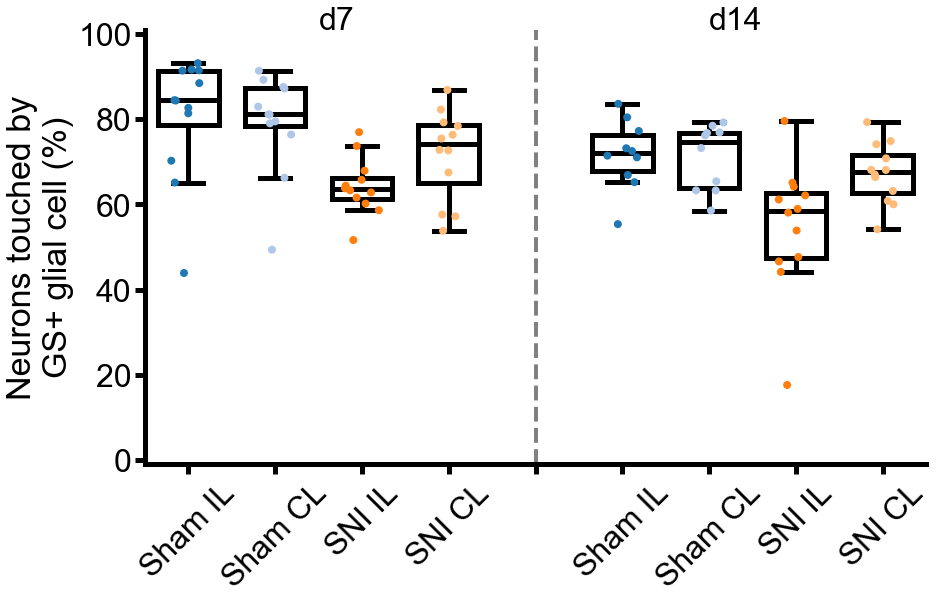

In [132]:
plot_all('ring_ratios_gs', 'Neurons touched by\nGS+ glial cell (%)')

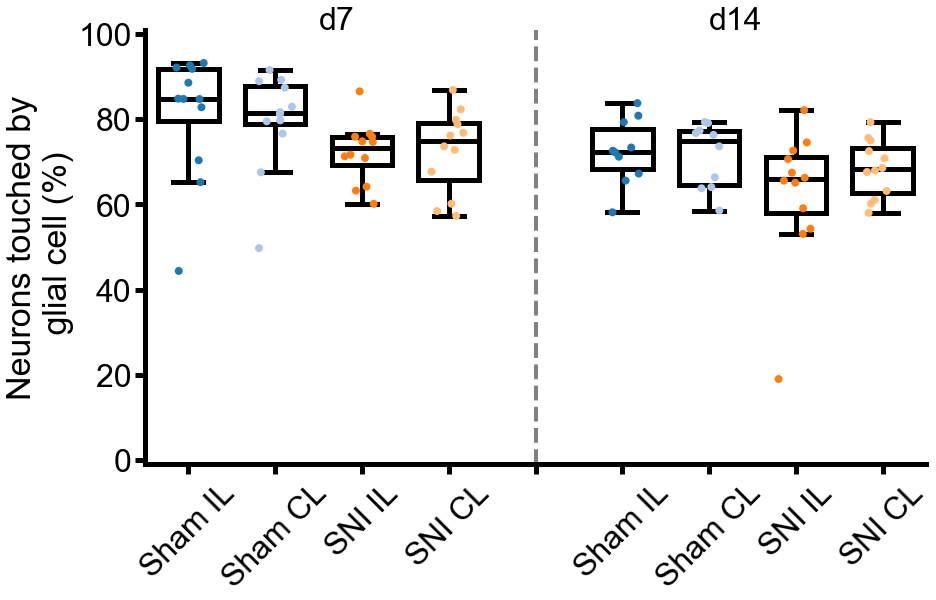

In [133]:
plot_all('ring_ratios_ring', 'Neurons touched by\n glial cell (%)')

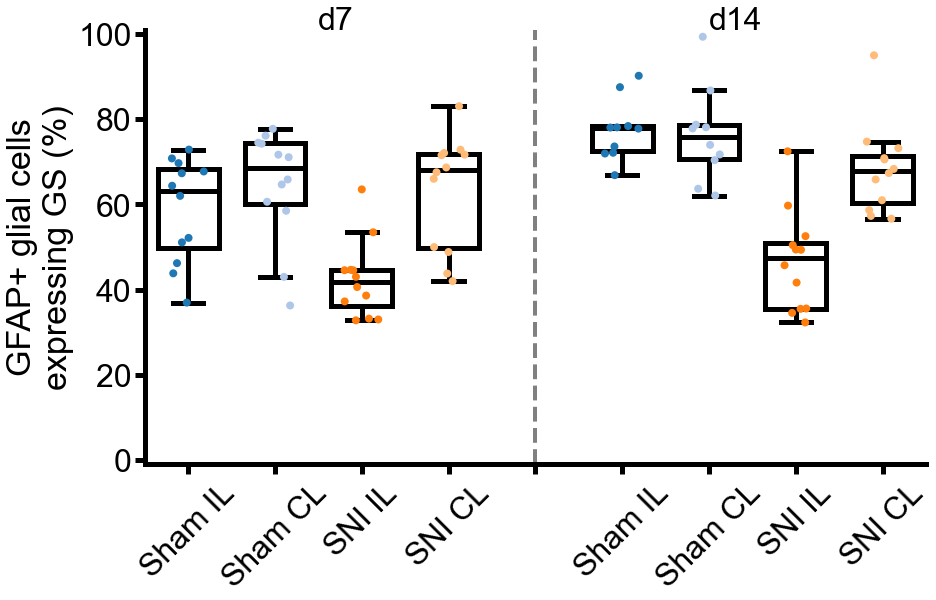

In [134]:
plot_all('gfap_overlaps', 'GFAP+ glial cells\nexpressing GS (%)')

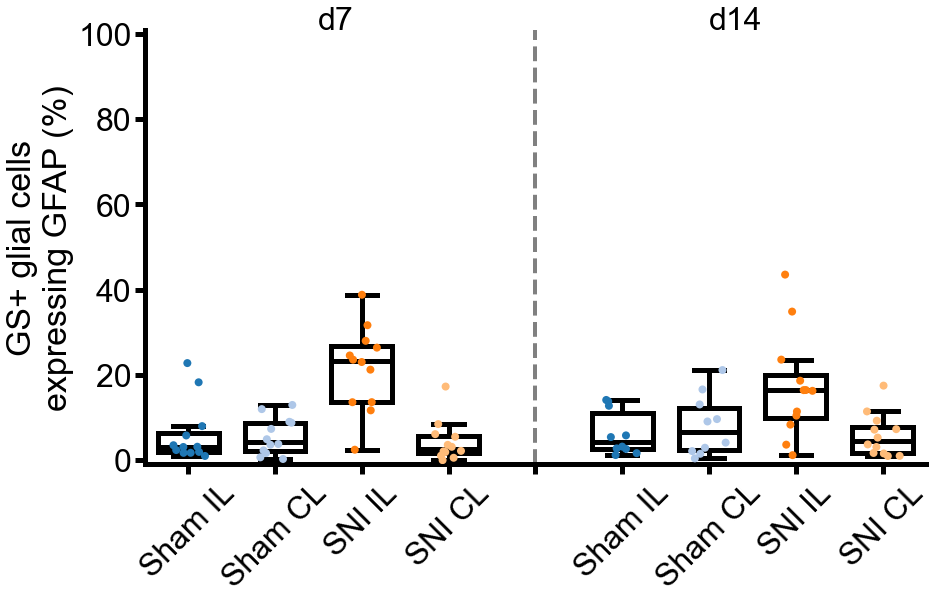

In [135]:
plot_all('gs_overlaps', 'GS+ glial cells\nexpressing GFAP (%)')

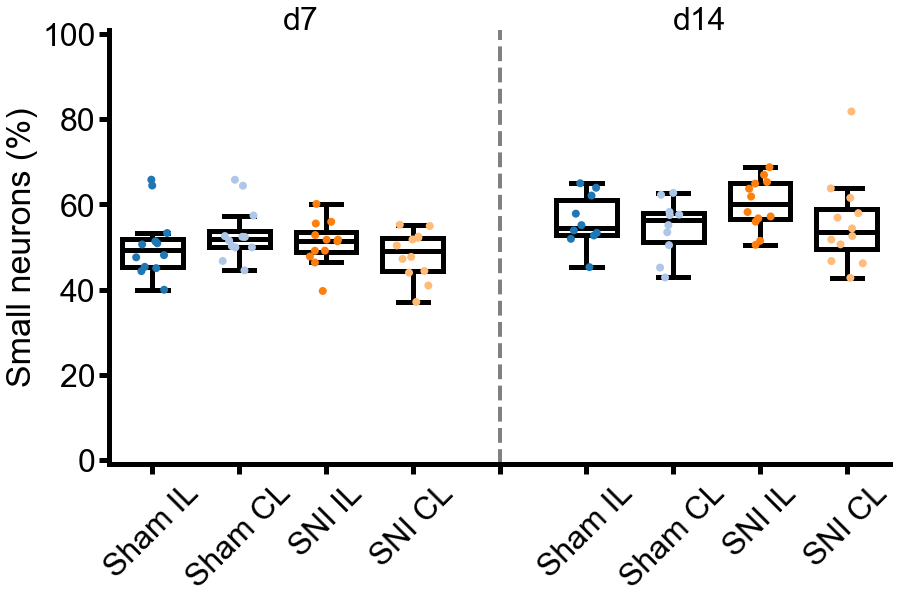

In [136]:
plot_all('small_neurons_percentage', 'Small neurons (%)')

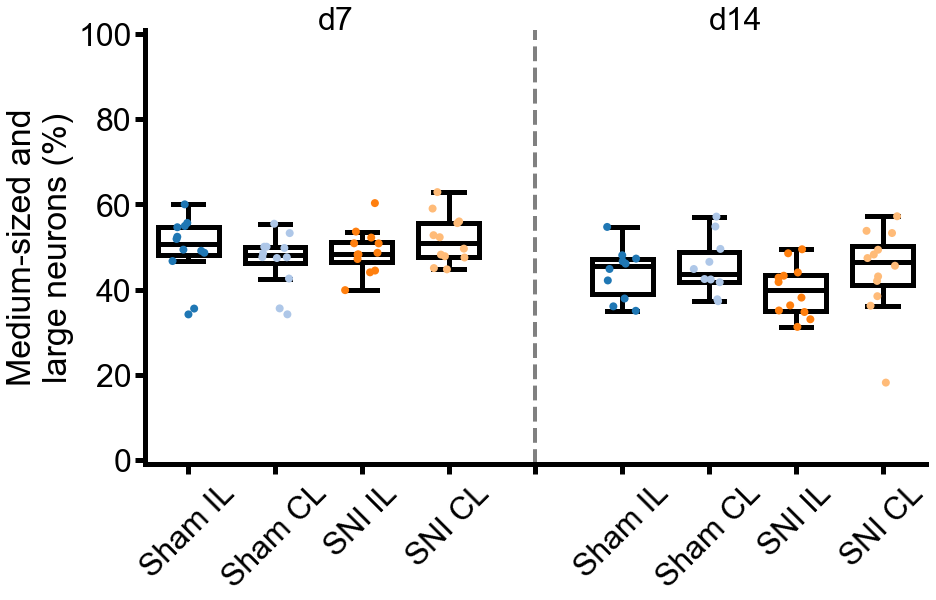

In [137]:
plot_all('bigger_neurons_percentage', 'Medium-sized and\nlarge neurons (%)')

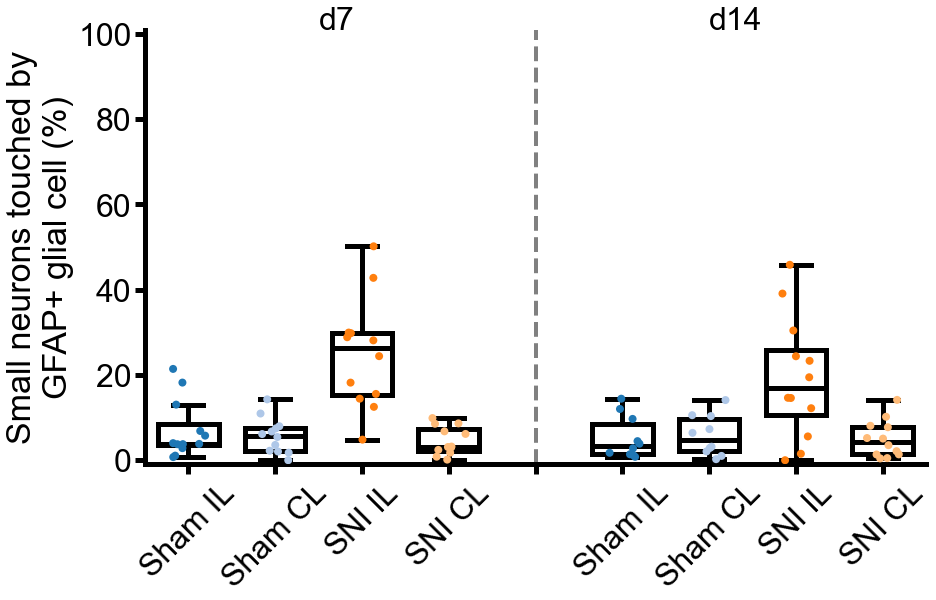

In [138]:
plot_all('small_neurons_gfap_ring', 'Small neurons touched by\nGFAP+ glial cell (%)')

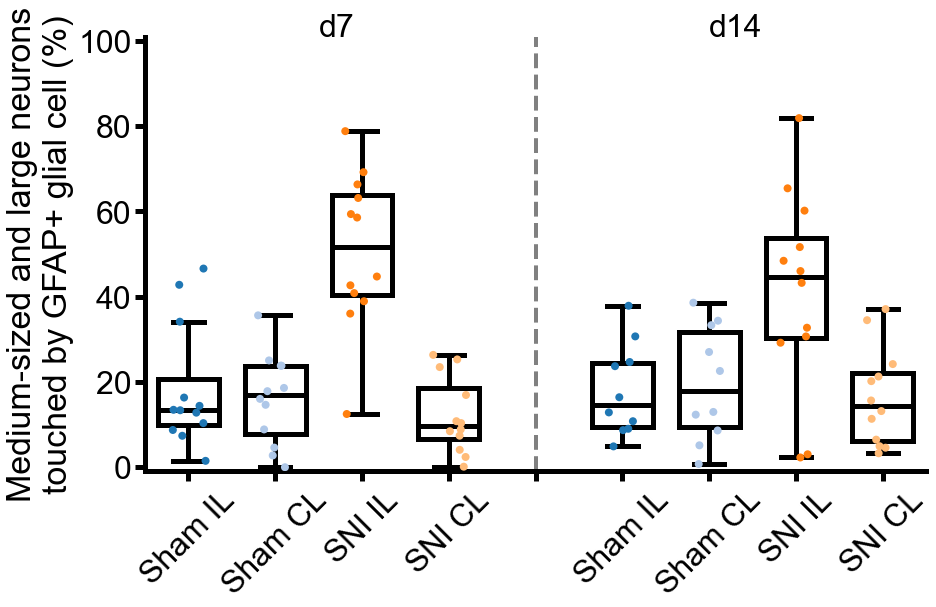

In [139]:
plot_all('bigger_neurons_gfap_ring', 'Medium-sized and large neurons\ntouched by GFAP+ glial cell (%)')

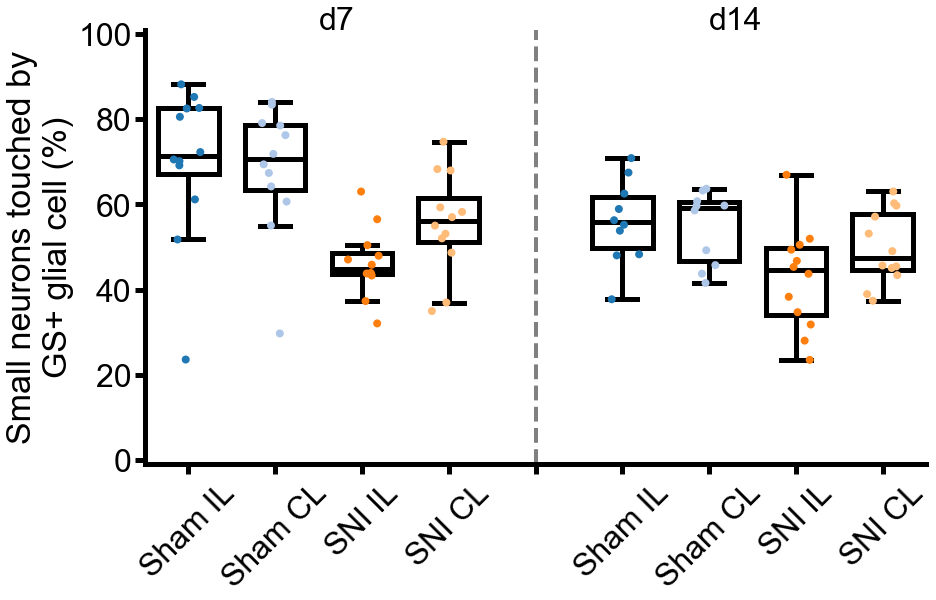

In [140]:
plot_all('small_neurons_gs_ring', 'Small neurons touched by\nGS+ glial cell (%)')

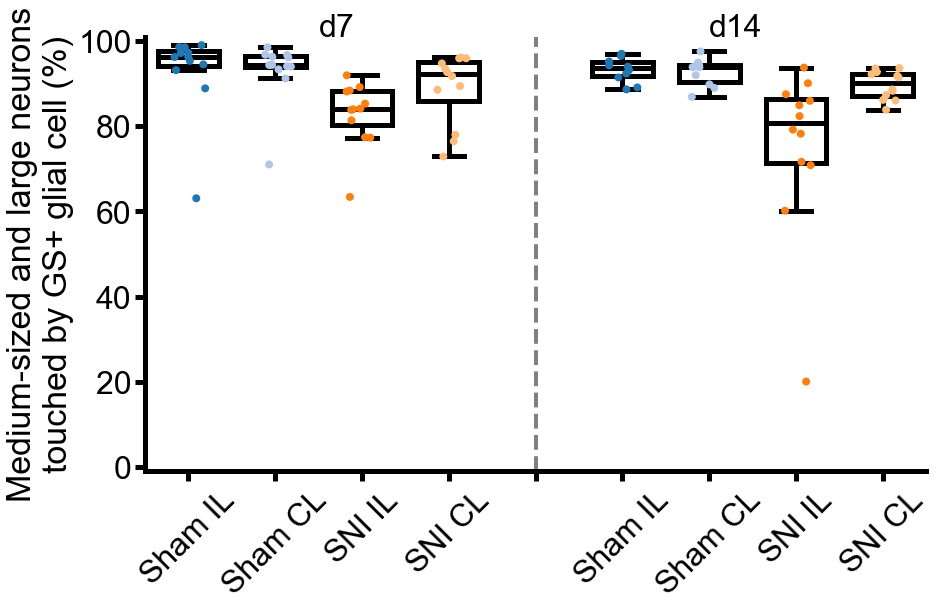

In [141]:
plot_all('bigger_neurons_gs_ring', 'Medium-sized and large neurons\ntouched by GS+ glial cell (%)')

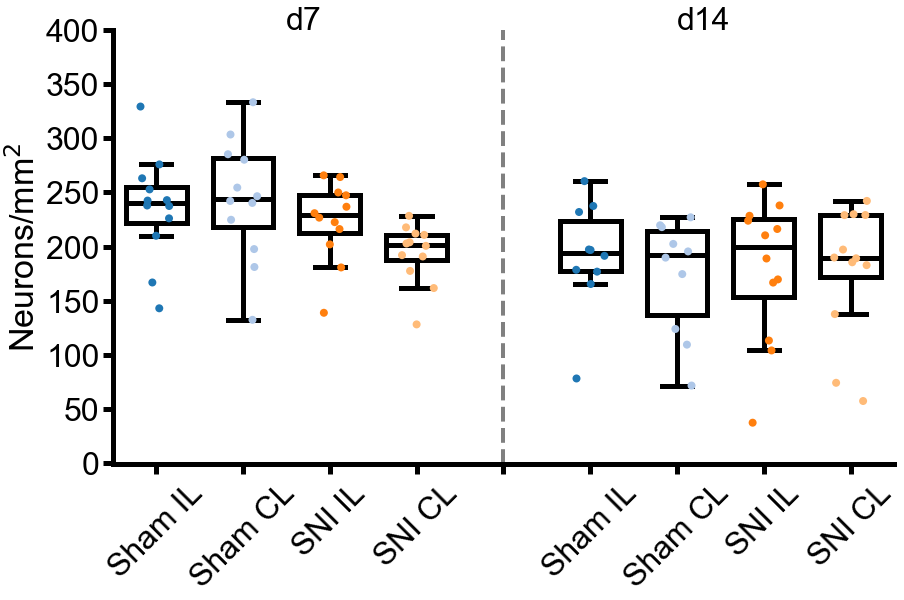

In [142]:
plot_all('neurons_per_tissue', 'Neurons/mm$^2$')

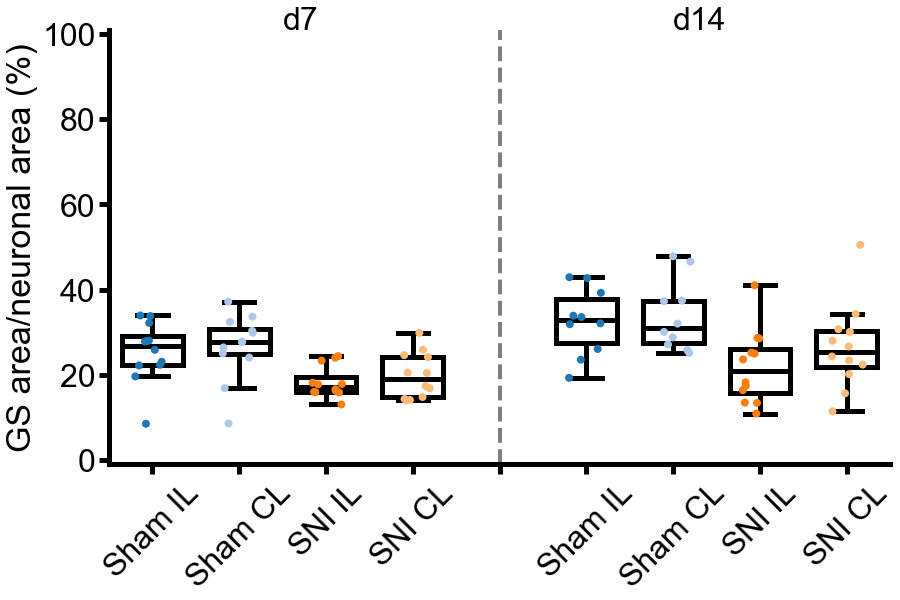

In [143]:
plot_all('gs_area_per_neurons', 'GS area/neuronal area (%)')

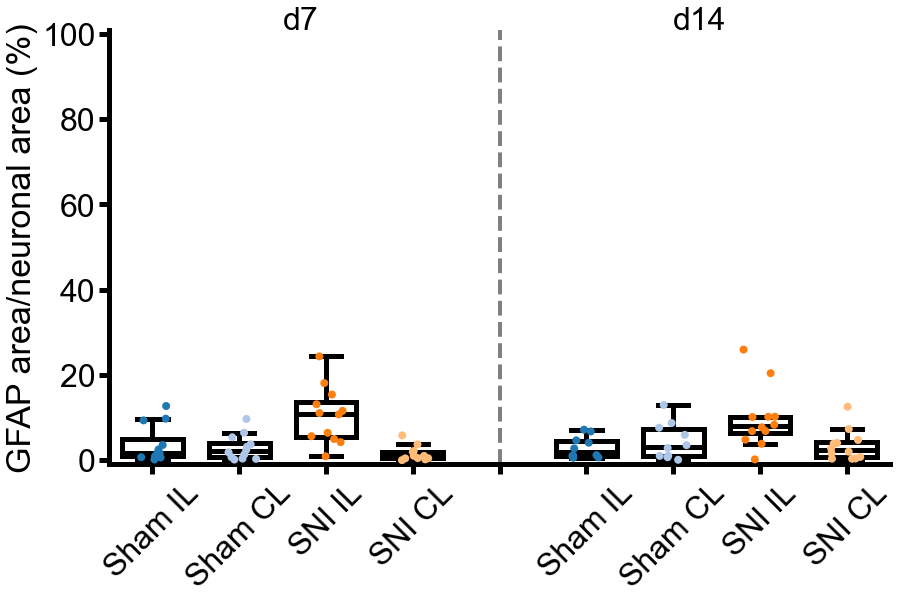

In [144]:
plot_all('gfap_area_per_neurons', 'GFAP area/neuronal area (%)')

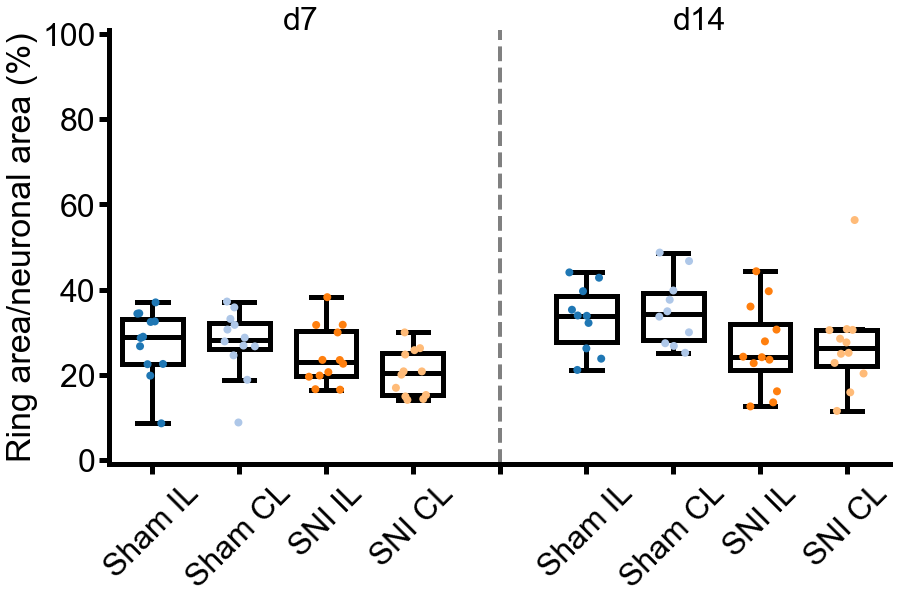

In [145]:
plot_all('ring_area_per_neurons', 'Ring area/neuronal area (%)')